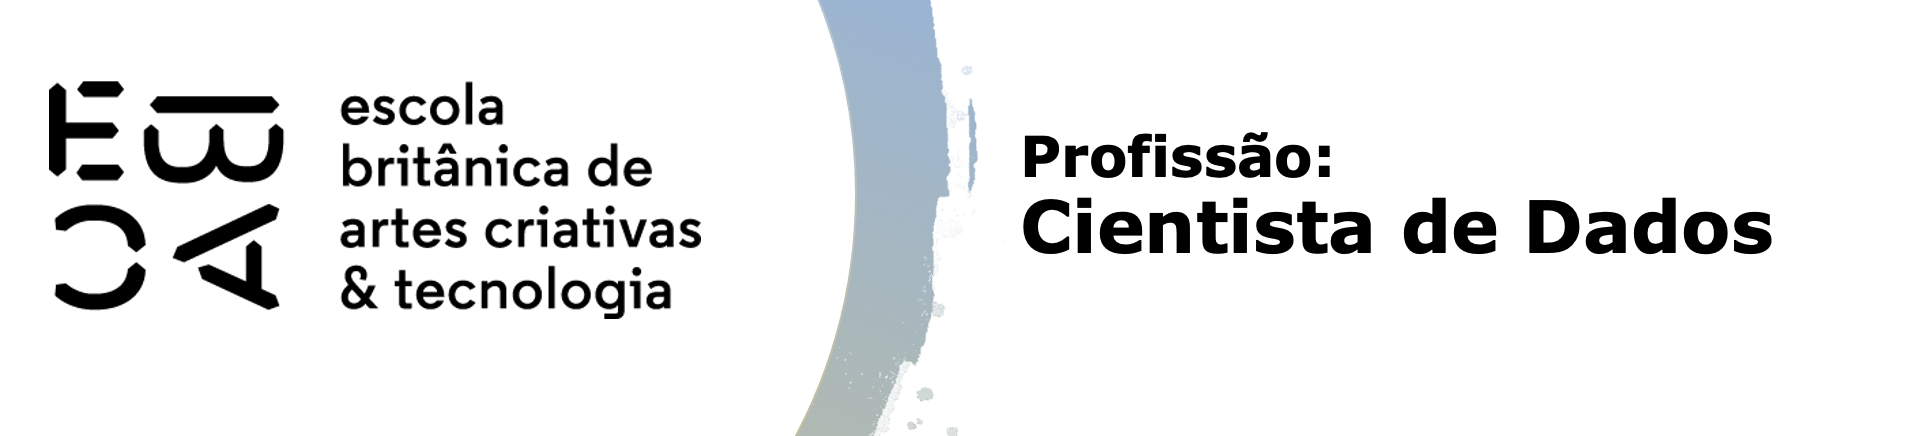

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [48]:
%%time
X_train = pd.read_csv(
    filepath_or_buffer='./bases_mod_17/X_train.csv')
X_train = X_train.drop(columns=['Unnamed: 0'])

X_train

CPU times: total: 1.27 s
Wall time: 1.69 s


,subject_train,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,30,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [49]:
y_train = (pd.read_csv
           (filepath_or_buffer='./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
            header=None)
           .squeeze('columns'))
y_train

0       5
1       5
2       5
3       5
4       5
       ..
7347    2
7348    2
7349    2
7350    2
7351    2
Name: 0, Length: 7352, dtype: int64

In [50]:
X_test = pd.read_csv(
    filepath_or_buffer='./bases_mod_17/X_test.csv')
X_test = X_test.drop(columns=['Unnamed: 0'])
X_test

,subject_test,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,24,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [51]:
y_test = (pd.read_csv
          (filepath_or_buffer='./human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
           header=None)
          .squeeze('columns')
         )
y_test

0       5
1       5
2       5
3       5
4       5
       ..
2942    2
2943    2
2944    2
2945    2
2946    2
Name: 0, Length: 2947, dtype: int64

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [52]:
cols = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']

X_train = X_train[cols]
X_test  = X_test [cols]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

clf = DecisionTreeClassifier(min_samples_leaf=20, 
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train, 
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('Quantidade de ccp_alphas:', ccp_alphas.size)

X_train: (7352, 3)
y_train: (7352,)
X_test: (2947, 3)
y_test: (2947,)
Quantidade de ccp_alphas: 108


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [53]:
%%time

clf = DecisionTreeClassifier(random_state=42)

grid_parametros = {'ccp_alpha': ccp_alphas[::10]}

grid = GridSearchCV(estimator=clf, 
                    param_grid=grid_parametros, 
                    cv=10, 
                    verbose=100)
grid.fit(X_train, y_train)

resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score').head()

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START ccp_alpha=0.0.............................................
[CV 1/10; 1/11] END ..............ccp_alpha=0.0;, score=0.776 total time=   0.0s
[CV 2/10; 1/11] START ccp_alpha=0.0.............................................
[CV 2/10; 1/11] END ..............ccp_alpha=0.0;, score=0.730 total time=   0.0s
[CV 3/10; 1/11] START ccp_alpha=0.0.............................................
[CV 3/10; 1/11] END ..............ccp_alpha=0.0;, score=0.844 total time=   0.0s
[CV 4/10; 1/11] START ccp_alpha=0.0.............................................
[CV 4/10; 1/11] END ..............ccp_alpha=0.0;, score=0.690 total time=   0.0s
[CV 5/10; 1/11] START ccp_alpha=0.0.............................................
[CV 5/10; 1/11] END ..............ccp_alpha=0.0;, score=0.741 total time=   0.0s
[CV 6/10; 1/11] START ccp_alpha=0.0.............................................
[CV 6/10; 1/11] END ..............ccp_alpha=0.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.044154,0.008195,0.003301,0.005368,0.007083,{'ccp_alpha': 0.007082924052720332},0.792120,0.808424,0.873469,0.771429,0.798639,0.790476,0.838095,0.779592,0.863946,0.722449,0.803864,0.042733,1
9,0.044066,0.006700,0.001495,0.001813,0.002034,{'ccp_alpha': 0.0020342316461378998},0.802989,0.736413,0.850340,0.765986,0.742857,0.783673,0.831293,0.737415,0.831293,0.737415,0.781967,0.042209,2
8,0.041240,0.008246,0.000766,0.001218,0.001120,{'ccp_alpha': 0.001120493079864795},0.764946,0.711957,0.838095,0.764626,0.748299,0.768707,0.814966,0.715646,0.838095,0.791837,0.775717,0.042774,3
5,0.039296,0.007540,0.002916,0.005367,0.000317,{'ccp_alpha': 0.000316912071380578},0.730978,0.736413,0.814966,0.714286,0.761905,0.749660,0.783673,0.795918,0.832653,0.790476,0.771093,0.036671,4
4,0.037846,0.005850,0.003357,0.006164,0.000206,{'ccp_alpha': 0.00020584175583017689},0.774457,0.743207,0.824490,0.700680,0.746939,0.730612,0.775510,0.791837,0.819048,0.789116,0.769589,0.037245,5


In [54]:
%%time
# melhor_ccp = resultados.iloc[grid.best_index_, 4]
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)



 rank_test_score vencedor:
	 mean_test_score: 0.8038638716356108
	 param_ccp_alpha: 0.007082924052720332
CPU times: total: 0 ns
Wall time: 0 ns


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.007083
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
monotonic_cst                 None
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7207329487614523


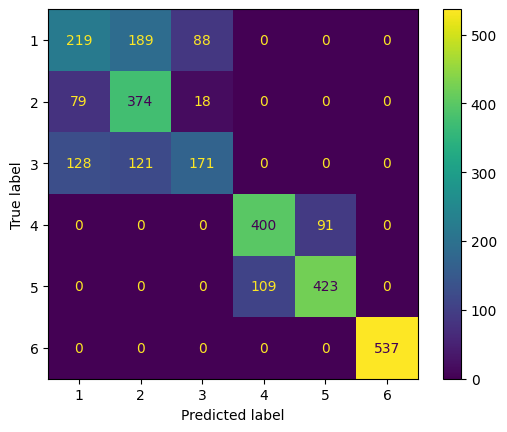

CPU times: total: 344 ms
Wall time: 440 ms


In [55]:
%%time

clf = DecisionTreeClassifier(random_state=42, 
                             ccp_alpha=melhor_ccp
                            ).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [56]:
%%time

matriz = confusion_matrix(y_true=y_test, 
                          y_pred=clf.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos, 
                   'erros':erros}, 
             index=pd.Index(data=list(range(1,7)), 
                            name='classe')
            ).sort_values(by='erros', 
                          ascending=False)

CPU times: total: 0 ns
Wall time: 9.39 ms


,acertos,erros
classe,,
2,374,310
1,219,207
4,400,109
3,171,106
5,423,91
6,537,0


In [57]:
print(y_train.value_counts().sort_index())

y_train_2 = pd.Series(data=(y_train == 2), 
                      name='classe_2')
y_train_2.value_counts()

0
1    1226
2    1073
3     986
4    1286
5    1374
6    1407
Name: count, dtype: int64


classe_2
False    6279
True     1073
Name: count, dtype: int64

In [58]:
%%time

clf_2 = DecisionTreeClassifier(min_samples_leaf=20, 
                               max_depth=4, 
                               random_state=42).fit(X=X_train, 
                                                    y=y_train_2)

melhores_classe2 = (pd.DataFrame(data={'var': X_train.columns, 
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_', 
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]
print('3 melhores variáveis:', cols_classe2, '\n')

cols_2 = cols_classe2.tolist()
X_train = X_train[cols_2]
X_test = X_test[cols_2]

print('X_train: \n', X_train.columns)
print('X_test: \n', X_test.columns)

3 melhores variáveis: ['42 tGravityAcc-mean()-Y' '390 fBodyAccJerk-bandsEnergy()-1,16'
 '53 tGravityAcc-min()-X'] 

X_train: 
 Index(['42 tGravityAcc-mean()-Y', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '53 tGravityAcc-min()-X'],
      dtype='object')
X_test: 
 Index(['42 tGravityAcc-mean()-Y', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '53 tGravityAcc-min()-X'],
      dtype='object')
CPU times: total: 31.2 ms
Wall time: 24.1 ms


In [59]:
X_train

,42 tGravityAcc-mean()-Y,"390 fBodyAccJerk-bandsEnergy()-1,16",53 tGravityAcc-min()-X
0,-0.140840,-0.999982,0.977436
1,-0.141551,-0.999987,0.984520
2,-0.142010,-0.999963,0.986770
3,-0.143976,-0.999978,0.986821
4,-0.148750,-0.999988,0.987434
...,...,...,...
7347,-0.222004,-0.775736,0.920554
7348,-0.242054,-0.780751,0.920554
7349,-0.236950,-0.783616,0.933008
7350,-0.233230,-0.821137,0.933008


In [66]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train, 
                                            y=y_train_2)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2, 
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]}, 
                      cv=10, 
                      verbose=100)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score').head()

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10; 1/13] START ccp_alpha=0.0.............................................
[CV 1/10; 1/13] END ..............ccp_alpha=0.0;, score=0.795 total time=   0.0s
[CV 2/10; 1/13] START ccp_alpha=0.0.............................................
[CV 2/10; 1/13] END ..............ccp_alpha=0.0;, score=0.742 total time=   0.0s
[CV 3/10; 1/13] START ccp_alpha=0.0.............................................
[CV 3/10; 1/13] END ..............ccp_alpha=0.0;, score=0.833 total time=   0.0s
[CV 4/10; 1/13] START ccp_alpha=0.0.............................................
[CV 4/10; 1/13] END ..............ccp_alpha=0.0;, score=0.684 total time=   0.0s
[CV 5/10; 1/13] START ccp_alpha=0.0.............................................
[CV 5/10; 1/13] END ..............ccp_alpha=0.0;, score=0.762 total time=   0.0s
[CV 6/10; 1/13] START ccp_alpha=0.0.............................................
[CV 6/10; 1/13] END ..............ccp_alpha=0.

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
12,0.038775,0.001779,0.002349,0.000459,0.015912,{'ccp_alpha': 0.015912138890510588},0.815217,0.808424,0.873469,0.785034,0.813605,0.823129,0.831293,0.779592,0.865306,0.722449,0.811752,0.041156,1
11,0.040090,0.001623,0.001844,0.000895,0.001530,{'ccp_alpha': 0.0015298340962762846},0.801630,0.724185,0.853061,0.761905,0.744218,0.782313,0.823129,0.738776,0.831293,0.779592,0.784010,0.040699,2
8,0.049866,0.004063,0.004567,0.004513,0.000301,{'ccp_alpha': 0.00030067006471565206},0.744565,0.740489,0.816327,0.715646,0.760544,0.759184,0.782313,0.793197,0.835374,0.790476,0.773812,0.034731,3
6,0.049262,0.010411,0.003750,0.004315,0.000222,{'ccp_alpha': 0.0002221617700398984},0.785326,0.745924,0.806803,0.703401,0.759184,0.725170,0.783673,0.793197,0.829932,0.787755,0.772037,0.036499,4
5,0.047981,0.007028,0.003873,0.005779,0.000203,{'ccp_alpha': 0.00020274120053628678},0.790761,0.745924,0.810884,0.699320,0.746939,0.733333,0.782313,0.793197,0.820408,0.787755,0.771083,0.036178,5


In [68]:
melhor_ccp_2 = resultados_2.iloc[grid_2.best_index_]['param_ccp_alpha']
resultados_2.iloc[grid_2.best_index_]['param_ccp_alpha'] == grid_2.best_params_['ccp_alpha']
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']

print('\n rank_test_score vencedor:')
print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)


 rank_test_score vencedor:
	 mean_test_score: 0.8117518855368233
	 param_ccp_alpha: 0.015912138890510588


Parâmetro                    Valor
ccp_alpha                 0.015912
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
monotonic_cst                 None
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.7227689175432643


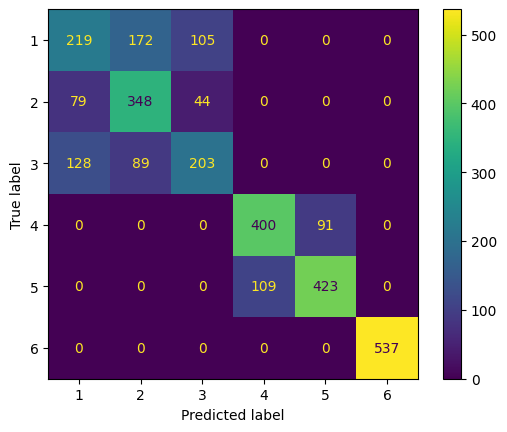

CPU times: total: 406 ms
Wall time: 462 ms


In [69]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42, 
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2, 
                                      X=X_test, 
                                      y=y_test)
plt.show()